# Merging DataFrames with pandas
- William Surles
- 2017-11-06
- Datacamp course
- [https://www.datacamp.com/courses/merging-dataframes-with-pandas](https://www.datacamp.com/courses/merging-dataframes-with-pandas)

## Whats Covered
- Preparing data
 - Reading multiple data files
 - Reindexing DataFrames
 - Arithmetic with Series & DataFrames
- Concatenating data
 - Appending & concatenating series
 - Appending & concatenating dataframes
 - Concatenation, keys, & Multi-indexes
 - Outer and inner joins
- Merging data
 - Merging Dataframes
 - Joining Dataframes
 - Ordered merges
- Case Study - Summer Olympics
 - Medals in the Summer Olypics
 - Quantifying Performance
 - Reshaping and plotting
 - Final thoughts

## Additional Resources

- [pandas expanding transformations documentation](http://pandas.pydata.org/pandas-docs/stable/computation.html#expanding-windows)

## Libraries and Data

In [407]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

# Preparing data

## Reading multiple data files

#### Tools for pandas data import
- pd.read_csv() for CSV files
 - `dataframe = pd.read_csv(filepath)`
 - about 50 optional input parameters
- Other data import tools:
 - pd.read_excel()
 - pd.read_html()
 - pd.read_json()

#### Loading separate files

In [5]:
dataframe0 = pd.read_csv('https://assets.datacamp.com/production/course_1681/datasets/sales-jan-2015.csv')
dataframe0.head()

,Date,Company,Product,Units
0,2015-01-21 19:13:21,Streeplex,Hardware,11
1,2015-01-09 05:23:51,Streeplex,Service,8
2,2015-01-06 17:19:34,Initech,Hardware,17
3,2015-01-02 09:51:06,Hooli,Hardware,16
4,2015-01-11 14:51:02,Hooli,Hardware,11


In [6]:
dataframe1 = pd.read_csv('https://assets.datacamp.com/production/course_1681/datasets/sales-feb-2015.csv')
dataframe1.head()

,Date,Company,Product,Units
0,2015-02-26 08:57:45,Streeplex,Service,4
1,2015-02-16 12:09:19,Hooli,Software,10
2,2015-02-03 14:14:18,Initech,Software,13
3,2015-02-02 08:33:01,Hooli,Software,3
4,2015-02-25 00:29:00,Initech,Service,10


#### Using a loop

In [10]:
filenames = ['https://assets.datacamp.com/production/course_1681/datasets/sales-jan-2015.csv', 
             'https://assets.datacamp.com/production/course_1681/datasets/sales-feb-2015.csv']

dataframes = []

for f in filenames:
    dataframes.append(pd.read_csv(f))
    
dataframes[0].head()

,Date,Company,Product,Units
0,2015-01-21 19:13:21,Streeplex,Hardware,11
1,2015-01-09 05:23:51,Streeplex,Service,8
2,2015-01-06 17:19:34,Initech,Hardware,17
3,2015-01-02 09:51:06,Hooli,Hardware,16
4,2015-01-11 14:51:02,Hooli,Hardware,11


#### Using a comprehension

In [11]:
dataframes = [pd.read_csv(f) for f in filenames]
dataframes[0].head()

,Date,Company,Product,Units
0,2015-01-21 19:13:21,Streeplex,Hardware,11
1,2015-01-09 05:23:51,Streeplex,Service,8
2,2015-01-06 17:19:34,Initech,Hardware,17
3,2015-01-02 09:51:06,Hooli,Hardware,16
4,2015-01-11 14:51:02,Hooli,Hardware,11


#### Using glob

In [23]:
# from glob import glob
filenames = glob('data/sales*.csv')
filenames

['data/sales-feb-2015.csv',
 'data/sales-jan-2015.csv',
 'data/sales-mar-2015.csv']

In [24]:
dataframes = [pd.read_csv(f) for f in filenames]
dataframes[0].head()

,Date,Company,Product,Units
0,2015-02-26 08:57:45,Streeplex,Service,4
1,2015-02-16 12:09:19,Hooli,Software,10
2,2015-02-03 14:14:18,Initech,Software,13
3,2015-02-02 08:33:01,Hooli,Software,3
4,2015-02-25 00:29:00,Initech,Service,10


### Reading DataFrames from multiple files

In [26]:
# Read 'Bronze.csv' into a DataFrame: bronze
bronze = pd.read_csv('data/Bronze.csv')

# Read 'Silver.csv' into a DataFrame: silver
silver = pd.read_csv('data/Silver.csv')

# Read 'Gold.csv' into a DataFrame: gold
gold = pd.read_csv('data/Gold.csv')

# Print the first five rows of gold
gold.head()

,NOC,Country,Total
0,USA,United States,2088.0
1,URS,Soviet Union,838.0
2,GBR,United Kingdom,498.0
3,FRA,France,378.0
4,GER,Germany,407.0


### Reading DataFrames from multiple files in a loop

In [28]:
# Create the list of file names: filenames
filenames = ['data/Gold.csv', 'data/Silver.csv', 'data/Bronze.csv']

# Create the list of three DataFrames: dataframes
dataframes = []
for filename in filenames:
    dataframes.append(pd.read_csv(filename))

# Print top 5 rows of 1st DataFrame in dataframes
dataframes[0].head()

,NOC,Country,Total
0,USA,United States,2088.0
1,URS,Soviet Union,838.0
2,GBR,United Kingdom,498.0
3,FRA,France,378.0
4,GER,Germany,407.0


### Combining DataFrames from multiple data files

In [29]:
# Make a copy of gold: medals
medals = gold.copy()

medals.head()

,NOC,Country,Total
0,USA,United States,2088.0
1,URS,Soviet Union,838.0
2,GBR,United Kingdom,498.0
3,FRA,France,378.0
4,GER,Germany,407.0


In [30]:
# Create list of new column labels: new_labels
new_labels = ['NOC', 'Country', 'Gold']

# Rename the columns of medals using new_labels
medals.columns = new_labels

medals.head()

,NOC,Country,Gold
0,USA,United States,2088.0
1,URS,Soviet Union,838.0
2,GBR,United Kingdom,498.0
3,FRA,France,378.0
4,GER,Germany,407.0


In [31]:
# Add columns 'Silver' & 'Bronze' to medals
medals['Silver'] = silver['Total']
medals['Bronze'] = bronze['Total']

# Print the head of medals
medals.head()

,NOC,Country,Gold,Silver,Bronze
0,USA,United States,2088.0,1195.0,1052.0
1,URS,Soviet Union,838.0,627.0,584.0
2,GBR,United Kingdom,498.0,591.0,505.0
3,FRA,France,378.0,461.0,475.0
4,GER,Germany,407.0,350.0,454.0


## Reindexing DataFrames

#### "Indexes" vs "Indicies"
- indices: many index labels within Index data structures
- indexes: many pandas Index data structures
- this is not a standard convention but they will use this convention in this class to be less ambiguous

#### Importing weather data
- Notice that the indexes are different
 - the mean is in alphabetical order, where as max is in time order

In [32]:
file_mean = 'https://assets.datacamp.com/production/course_1681/datasets/quarterly_mean_temp.csv'
file_max = 'https://assets.datacamp.com/production/course_1681/datasets/quarterly_max_temp.csv'

w_mean = pd.read_csv(file_mean, index_col = 'Month')
w_max = pd.read_csv(file_max, index_col = 'Month')

print(w_mean.head())
print(w_max.head())

       Mean TemperatureF
Month                   
Apr            61.956044
Jan            32.133333
Jul            68.934783
Oct            43.434783
       Max TemperatureF
Month                  
Jan                  68
Apr                  89
Jul                  91
Oct                  84


#### The Dataframe indexes

In [34]:
print(w_mean.index)
print(w_max.index)
print(type(w_mean.index))

Index(['Apr', 'Jan', 'Jul', 'Oct'], dtype='object', name='Month')
Index(['Jan', 'Apr', 'Jul', 'Oct'], dtype='object', name='Month')
<class 'pandas.core.indexes.base.Index'>


#### Using .reindex()
- We can use `.reindex` to reorder the index

In [35]:
ordered = ['Jan','Apr','Jul','Oct']
w_mean2 = w_mean.reindex(ordered)
w_mean2

,Mean TemperatureF
Month,
Jan,32.133333
Apr,61.956044
Jul,68.934783
Oct,43.434783


#### Using .sort_index()
- We can put the index back to the orginal order using `.sort_index()`

In [36]:
w_mean2.sort_index()

,Mean TemperatureF
Month,
Apr,61.956044
Jan,32.133333
Jul,68.934783
Oct,43.434783


#### Reindex from a DataFrame index
- If you are going to join two data frames you can ensure they have the same index by reindexing from another index

In [38]:
w_mean.reindex(w_max.index)

,Mean TemperatureF
Month,
Jan,32.133333
Apr,61.956044
Jul,68.934783
Oct,43.434783


#### Reindexing with missing labels
- If you reindex on labels that do not exist in the dataframe you will get a nan
- You can also drp rows by not including them in the index labels when reindexing

In [40]:
w_mean3 = w_mean.reindex(['Jan','Apr','Dec'])
w_mean3

,Mean TemperatureF
Month,
Jan,32.133333
Apr,61.956044
Dec,NaN


#### Reindex from a dataframe index
- You can use the reindex to see which indicies are in both dataframes and which are missing
- `dropna()` can be used to remove NaNs

In [41]:
w_max.reindex(w_mean3.index)

,Max TemperatureF
Month,
Jan,68.0
Apr,89.0
Dec,NaN


In [43]:
w_max.reindex(w_mean3.index).dropna()

,Max TemperatureF
Month,
Jan,68.0
Apr,89.0


### Sorting DataFrame with the Index & columns

In [46]:
# Read 'monthly_max_temp.csv' into a DataFrame: weather1
file = 'https://assets.datacamp.com/production/course_1681/datasets/monthly_max_temp.csv'
weather1 = pd.read_csv(file, index_col = 'Month')

# Print the head of weather1
weather1.head()

,Max TemperatureF
Month,
Jan,68
Feb,60
Mar,68
Apr,84
May,88


In [47]:
# Sort the index of weather1 in alphabetical order: weather2
weather2 = weather1.sort_index()

# Print the head of weather2
weather2.head()

,Max TemperatureF
Month,
Apr,84
Aug,86
Dec,68
Feb,60
Jan,68


In [48]:
# Sort the index of weather1 in reverse alphabetical order: weather3
weather3 = weather1.sort_index(ascending=False)

# Print the head of weather3
weather3.head()

,Max TemperatureF
Month,
Sep,90
Oct,84
Nov,72
May,88
Mar,68


In [49]:
# Sort weather1 numerically using the values of 'Max TemperatureF': weather4
weather4 = weather1.sort_values('Max TemperatureF')

# Print the head of weather4
weather4.head()

,Max TemperatureF
Month,
Feb,60
Jan,68
Mar,68
Dec,68
Nov,72


### Reindexing DataFrame from a list

In [52]:
year = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
weather1 = w_mean

# Reindex weather1 using the list year: weather2
weather2 = weather1.reindex(year)

# Print weather2
weather2

,Mean TemperatureF
Month,
Jan,32.133333
Feb,NaN
Mar,NaN
Apr,61.956044
May,NaN
Jun,NaN
Jul,68.934783
Aug,NaN
Sep,NaN


In [53]:
# Reindex weather1 using the list year with forward-fill: weather3
weather3 = weather1.reindex(year).ffill()

# Print weather3
weather3

,Mean TemperatureF
Month,
Jan,32.133333
Feb,32.133333
Mar,32.133333
Apr,61.956044
May,61.956044
Jun,61.956044
Jul,68.934783
Aug,68.934783
Sep,68.934783


### Reindexing using another DataFrame Index

In [54]:
file_1981 = 'https://assets.datacamp.com/production/course_1681/datasets/names1981.csv'
file_1881 = 'https://assets.datacamp.com/production/course_1681/datasets/names1881.csv'

names_1981 = pd.read_csv(file_1981, header=None, names=['name','gender','count'], index_col=(0,1))
names_1881 = pd.read_csv(file_1881, header=None, names=['name','gender','count'], index_col=(0,1))

print(names_1981.head())
print(names_1881.head())

                 count
name     gender       
Jennifer F       57032
Jessica  F       42519
Amanda   F       34370
Sarah    F       28162
Melissa  F       28003
                  count
name      gender       
Mary      F        6919
Anna      F        2698
Emma      F        2034
Elizabeth F        1852
Margaret  F        1658


In [55]:
# Reindex names_1981 with index of names_1881: common_names
common_names = names_1981.reindex(names_1881.index)

# Print shape of common_names
print(common_names.shape)

(1935, 1)


In [56]:
# Drop rows with null counts: common_names
common_names = common_names.dropna()

# Print shape of new common_names
print(common_names.shape)

(1587, 1)


## Arithmetic with Series & DataFrames

#### Loading weather data

In [57]:
file = 'https://assets.datacamp.com/production/course_1681/datasets/pittsburgh2013.csv'
weather = pd.read_csv(file, index_col = 'Date', parse_dates = True)
weather.head()

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,32,28,21,30,27,16,100,89,77,30.10,...,10,6,2,10,8,NaN,0.00,8,Snow,277
2013-01-02,25,21,17,14,12,10,77,67,55,30.27,...,10,10,10,14,5,NaN,0.00,4,NaN,272
2013-01-03,32,24,16,19,15,9,77,67,56,30.25,...,10,10,10,17,8,26.0,0.00,3,NaN,229
2013-01-04,30,28,27,21,19,17,75,68,59,30.28,...,10,10,6,23,16,32.0,0.00,4,NaN,250
2013-01-05,34,30,25,23,20,16,75,68,61,30.42,...,10,10,10,16,10,23.0,0.21,5,NaN,221


In [58]:
weather.loc['2013-7-1':'2013-7-7', 'PrecipitationIn']

Date
2013-07-01    0.18
2013-07-02    0.14
2013-07-03    0.00
2013-07-04    0.25
2013-07-05    0.02
2013-07-06    0.06
2013-07-07    0.10
Name: PrecipitationIn, dtype: float64

#### Scalar multiplication
- here we convert the precipitation data from in to cm

In [59]:
weather.loc['2013-07-01':'2013-07-07', 'PrecipitationIn'] * 2.54

Date
2013-07-01    0.4572
2013-07-02    0.3556
2013-07-03    0.0000
2013-07-04    0.6350
2013-07-05    0.0508
2013-07-06    0.1524
2013-07-07    0.2540
Name: PrecipitationIn, dtype: float64

#### Absolute temperature range

In [60]:
week1_range = weather.loc['2013-07-01':'2013-07-07',['Min TemperatureF','Max TemperatureF']]
week1_range

,Min TemperatureF,Max TemperatureF
Date,,
2013-07-01,66,79
2013-07-02,66,84
2013-07-03,71,86
2013-07-04,70,86
2013-07-05,69,86
2013-07-06,70,89
2013-07-07,70,77


#### Average temperature

In [65]:
week1_mean = weather.loc['2013-07-01':'2013-07-07','Mean TemperatureF']
week1_mean

Date
2013-07-01    72
2013-07-02    74
2013-07-03    78
2013-07-04    77
2013-07-05    76
2013-07-06    78
2013-07-07    72
Name: Mean TemperatureF, dtype: int64

#### Relative temperature range

In [66]:
week1_range.divide(week1_mean, axis = 'rows')

,Min TemperatureF,Max TemperatureF
Date,,
2013-07-01,0.916667,1.097222
2013-07-02,0.891892,1.135135
2013-07-03,0.910256,1.102564
2013-07-04,0.909091,1.116883
2013-07-05,0.907895,1.131579
2013-07-06,0.897436,1.141026
2013-07-07,0.972222,1.069444


#### Percent changes

In [67]:
week1_mean.pct_change() * 100

Date
2013-07-01         NaN
2013-07-02    2.777778
2013-07-03    5.405405
2013-07-04   -1.282051
2013-07-05   -1.298701
2013-07-06    2.631579
2013-07-07   -7.692308
Name: Mean TemperatureF, dtype: float64

#### Load medals data

In [69]:
gold = pd.read_csv('data/gold_top5.csv',index_col=0)
silver = pd.read_csv('data/silver_top5.csv',index_col=0)
bronze = pd.read_csv('data/bronze_top5.csv',index_col=0)

gold.head()

,Total
Country,
United States,2088.0
Soviet Union,838.0
United Kingdom,498.0
Italy,460.0
Germany,407.0


#### Adding bronze and silver
- just adding the dataframes will give the union of the indexes
- because germany and italy are not in both they show up as nans
- arithmatic only works on rows with common index values. sigh

In [70]:
bronze + silver

,Total
Country,
France,936.0
Germany,NaN
Italy,NaN
Soviet Union,1211.0
United Kingdom,1096.0
United States,2247.0


#### Using the .add() method
- we can use the .add method. 
- it will give the same results as above
- but we can add the `fill_value` method to fill NaNs so all the rows will have proper sums

In [72]:
bronze.add(silver)

,Total
Country,
France,936.0
Germany,NaN
Italy,NaN
Soviet Union,1211.0
United Kingdom,1096.0
United States,2247.0


In [73]:
bronze.add(silver, fill_value = 0)

,Total
Country,
France,936.0
Germany,454.0
Italy,394.0
Soviet Union,1211.0
United Kingdom,1096.0
United States,2247.0


#### Chaining .add()

In [74]:
bronze.add(silver, fill_value=0).add(gold, fill_value=0)

,Total
Country,
France,936.0
Germany,861.0
Italy,854.0
Soviet Union,2049.0
United Kingdom,1594.0
United States,4335.0


### Broadcasting in arithmetic formulas

In [75]:
weather.head()

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,32,28,21,30,27,16,100,89,77,30.10,...,10,6,2,10,8,NaN,0.00,8,Snow,277
2013-01-02,25,21,17,14,12,10,77,67,55,30.27,...,10,10,10,14,5,NaN,0.00,4,NaN,272
2013-01-03,32,24,16,19,15,9,77,67,56,30.25,...,10,10,10,17,8,26.0,0.00,3,NaN,229
2013-01-04,30,28,27,21,19,17,75,68,59,30.28,...,10,10,6,23,16,32.0,0.00,4,NaN,250
2013-01-05,34,30,25,23,20,16,75,68,61,30.42,...,10,10,10,16,10,23.0,0.21,5,NaN,221


In [76]:
# Extract selected columns from weather as new DataFrame: temps_f
temps_f = weather[['Min TemperatureF','Mean TemperatureF','Max TemperatureF']]

temps_f.head()

,Min TemperatureF,Mean TemperatureF,Max TemperatureF
Date,,,
2013-01-01,21,28,32
2013-01-02,17,21,25
2013-01-03,16,24,32
2013-01-04,27,28,30
2013-01-05,25,30,34


In [77]:
# Convert temps_f to celsius: temps_c
temps_c = (temps_f - 32) * 5/9

# Rename 'F' in column names with 'C': temps_c.columns
temps_c.columns = temps_c.columns.str.replace('F','C')

# Print first 5 rows of temps_c
temps_c.head()

,Min TemperatureC,Mean TemperatureC,Max TemperatureC
Date,,,
2013-01-01,-6.111111,-2.222222,0.000000
2013-01-02,-8.333333,-6.111111,-3.888889
2013-01-03,-8.888889,-4.444444,0.000000
2013-01-04,-2.777778,-2.222222,-1.111111
2013-01-05,-3.888889,-1.111111,1.111111


### Computing percentage growth of GDP

In [78]:
# Read 'GDP.csv' into a DataFrame: gdp
file = 'https://assets.datacamp.com/production/course_1681/datasets/GDP.csv'
gdp = pd.read_csv(file, index_col = 'DATE', parse_dates = True)
gdp.head()

,VALUE
DATE,
1947-01-01,243.1
1947-04-01,246.3
1947-07-01,250.1
1947-10-01,260.3
1948-01-01,266.2


In [79]:
# Slice all the gdp data from 2008 onward: post2008
post2008 = gdp['2008':]

post2008.head()

,VALUE
DATE,
2008-01-01,14668.4
2008-04-01,14813.0
2008-07-01,14843.0
2008-10-01,14549.9
2009-01-01,14383.9


In [80]:
# Resample post2008 by year, keeping last(): yearly
yearly = post2008.resample('A').last()

# Print yearly
yearly

,VALUE
DATE,
2008-12-31,14549.9
2009-12-31,14566.5
2010-12-31,15230.2
2011-12-31,15785.3
2012-12-31,16297.3
2013-12-31,16999.9
2014-12-31,17692.2
2015-12-31,18222.8
2016-12-31,18436.5


In [81]:
# Compute percentage growth of yearly: yearly['growth']
yearly['growth'] = yearly.pct_change() * 100

# Print yearly again
yearly

,VALUE,growth
DATE,,
2008-12-31,14549.9,NaN
2009-12-31,14566.5,0.114090
2010-12-31,15230.2,4.556345
2011-12-31,15785.3,3.644732
2012-12-31,16297.3,3.243524
2013-12-31,16999.9,4.311144
2014-12-31,17692.2,4.072377
2015-12-31,18222.8,2.999062
2016-12-31,18436.5,1.172707


### Converting currency of stocks

In [82]:
# Read 'sp500.csv' into a DataFrame: sp500
file = 'https://assets.datacamp.com/production/course_1681/datasets/sp500.csv'
sp500 = pd.read_csv(file, index_col = 'Date', parse_dates=True)
sp500.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2708700000,2058.199951
2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,3799120000,2020.579956
2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,4460110000,2002.609985
2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,3805480000,2025.900024
2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,3934010000,2062.139893


In [83]:
# Read 'exchange.csv' into a DataFrame: exchange
file = 'https://assets.datacamp.com/production/course_1681/datasets/exchange.csv'
exchange = pd.read_csv(file, index_col = 'Date', parse_dates=True)
exchange.head()

,GBP/USD
Date,
2015-01-02,0.65101
2015-01-05,0.65644
2015-01-06,0.65896
2015-01-07,0.66344
2015-01-08,0.66151


In [84]:
# Subset 'Open' & 'Close' columns from sp500: dollars
dollars = sp500[['Open', 'Close']]

# Print the head of dollars
dollars.head()

,Open,Close
Date,,
2015-01-02,2058.899902,2058.199951
2015-01-05,2054.439941,2020.579956
2015-01-06,2022.150024,2002.609985
2015-01-07,2005.550049,2025.900024
2015-01-08,2030.609985,2062.139893


In [85]:
# Convert dollars to pounds: pounds
pounds = dollars.multiply(exchange['GBP/USD'], axis = 'rows')

# Print the head of pounds
pounds.head()

,Open,Close
Date,,
2015-01-02,1340.364425,1339.908750
2015-01-05,1348.616555,1326.389506
2015-01-06,1332.515980,1319.639876
2015-01-07,1330.562125,1344.063112
2015-01-08,1343.268811,1364.126161


# Concatenating data

## Appending & concatenating Series

#### append()
- `.append()`: Series and DataFrame method
- Invocation:
 - s1.append(s2)
- Stacks rows of s2 below s1
- Method for Series & Dataframes

#### concat()
- concat():pandas module function
- Invocation:
 - pd.concat([s1,s2,s3])
- Can stack row-wise or column-wise

#### concat() & .append()
- concat is similar to chaining multiple append calls
- Equivalence of concat() & .append():
 - `result1 = pd.concat([s1,s2,s3])`
 - `result2 = s1.append(s2).append(s3)`
- result1 == result2 elementwise

#### Using .append()
- Notice the indicies are kept from the original series
- using loc will return multiple values for a single index. 

In [86]:
northeast = pd.Series(['CT', 'ME','MA'])
south = pd.Series(['DE', 'FL','GA'])
midwest = pd.Series(['IL', 'IN','MN'])
west = pd.Series(['AZ', 'CO','ID'])

In [88]:
east = northeast.append(south)
east

0    CT
1    ME
2    MA
0    DE
1    FL
2    GA
dtype: object

In [90]:
print(east.index)
print('-----------------')
print(east.loc[2])

Int64Index([0, 1, 2, 0, 1, 2], dtype='int64')
-----------------
2    MA
2    GA
dtype: object


#### Using .reset_index()
- its often important to have a unique index on dataframes
- one way to fix the index is to reset it

In [95]:
new_east = northeast.append(south).reset_index(drop=True)
new_east

0    CT
1    ME
2    MA
3    DE
4    FL
5    GA
dtype: object

In [96]:
print(new_east.index)

RangeIndex(start=0, stop=6, step=1)


#### Using concat()
- with concat you will get the same index with duplicate values by default
- but you can use ignore_index to get a df similar to new_east easily

In [98]:
east = pd.concat([northeast, south])
east

0    CT
1    ME
2    MA
0    DE
1    FL
2    GA
dtype: object

In [99]:
east = pd.concat([northeast, south], ignore_index=True)
east

0    CT
1    ME
2    MA
3    DE
4    FL
5    GA
dtype: object

### Appending Series with nonunique Indices

In [101]:
combined = bronze.append(silver)
combined

,Total
Country,
United States,1052.0
Soviet Union,584.0
United Kingdom,505.0
France,475.0
Germany,454.0
United States,1195.0
Soviet Union,627.0
United Kingdom,591.0
France,461.0


In [103]:
combined.loc['United States']

,Total
Country,
United States,1052.0
United States,1195.0


### Appending pandas Series

In [104]:
# Load 'sales-jan-2015.csv' into a DataFrame: jan
jan = pd.read_csv('data/sales-jan-2015.csv', index_col = 'Date', parse_dates = True)
feb = pd.read_csv('data/sales-feb-2015.csv', index_col = 'Date', parse_dates = True)
mar = pd.read_csv('data/sales-mar-2015.csv', index_col = 'Date', parse_dates = True)

jan.head()

,Company,Product,Units
Date,,,
2015-01-21 19:13:21,Streeplex,Hardware,11
2015-01-09 05:23:51,Streeplex,Service,8
2015-01-06 17:19:34,Initech,Hardware,17
2015-01-02 09:51:06,Hooli,Hardware,16
2015-01-11 14:51:02,Hooli,Hardware,11


In [106]:
# Extract the 'Units' column from jan: jan_units
jan_units = jan['Units']

# Extract the 'Units' column from feb: feb_units
feb_units = feb['Units']

# Extract the 'Units' column from mar: mar_units
mar_units = mar['Units']

# Append feb_units and then mar_units to jan_units: quarter1
quarter1 = jan_units.append(feb_units).append(mar_units)

# Print the first slice from quarter1
print(quarter1.loc['jan 27, 2015':'feb 2, 2015'])
print('---------')

# Print the second slice from quarter1
print(quarter1.loc['feb 26, 2015':'mar 7, 2015'])
print('---------')

# Compute & print total sales in quarter1
print(quarter1.sum())


Date
2015-01-27 07:11:55    18
2015-02-02 08:33:01     3
2015-02-02 20:54:49     9
Name: Units, dtype: int64
---------
Date
2015-02-26 08:57:45     4
2015-02-26 08:58:51     1
2015-03-06 10:11:45    17
2015-03-06 02:03:56    17
Name: Units, dtype: int64
---------
642


### Concatenating pandas Series along row axis

In [108]:
# Initialize empty list: units
units = []

# Build the list of Series
for month in [jan, feb, mar]:
    units.append(month['Units'])

units[0].head()

Date
2015-01-21 19:13:21    11
2015-01-09 05:23:51     8
2015-01-06 17:19:34    17
2015-01-02 09:51:06    16
2015-01-11 14:51:02    11
Name: Units, dtype: int64

In [109]:
# Concatenate the list: quarter1
quarter1 = pd.concat(units, axis='rows')

quarter1.head()

Date
2015-01-21 19:13:21    11
2015-01-09 05:23:51     8
2015-01-06 17:19:34    17
2015-01-02 09:51:06    16
2015-01-11 14:51:02    11
Name: Units, dtype: int64

In [110]:
# Print slices from quarter1
print(quarter1.loc['jan 27, 2015':'feb 2, 2015'])
print(quarter1.loc['feb 26, 2015':'mar 7, 2015'])

Date
2015-01-27 07:11:55    18
2015-02-02 08:33:01     3
2015-02-02 20:54:49     9
Name: Units, dtype: int64
Date
2015-02-26 08:57:45     4
2015-02-26 08:58:51     1
2015-03-06 10:11:45    17
2015-03-06 02:03:56    17
Name: Units, dtype: int64


In [111]:
quarter1_all = pd.concat([jan, feb, mar], axis='rows')
quarter1_all.head()

,Company,Product,Units
Date,,,
2015-01-21 19:13:21,Streeplex,Hardware,11
2015-01-09 05:23:51,Streeplex,Service,8
2015-01-06 17:19:34,Initech,Hardware,17
2015-01-02 09:51:06,Hooli,Hardware,16
2015-01-11 14:51:02,Hooli,Hardware,11


## Appending & concatenating DataFrames

#### Loading population data
- these data frames are both 4 x 1 and have the same index name and column name

In [112]:
file = 'https://assets.datacamp.com/production/course_1681/datasets/population_01.csv'
pop1 = pd.read_csv(file, index_col=0)
pop1.head()

,2010 Census Population
Zip Code ZCTA,
66407,479
72732,4716
50579,2405
46241,30670


In [113]:
file = 'https://assets.datacamp.com/production/course_1681/datasets/population_02.csv'
pop2 = pd.read_csv(file, index_col=0)
pop2.head()

,2010 Census Population
Zip Code ZCTA,
12776,2180
76092,26669
98360,12221
49464,27481


In [116]:
pop1.append(pop2)

,2010 Census Population
Zip Code ZCTA,
66407,479
72732,4716
50579,2405
46241,30670
12776,2180
76092,26669
98360,12221
49464,27481


#### Population & Unemployment data
- These dataframes have different number of columns and different index names
- 2860 is the only in dex label that appears in both dataframes

In [117]:
file = 'https://assets.datacamp.com/production/course_1681/datasets/population_00.csv'
population = pd.read_csv(file, index_col=0)
population.head()

,2010 Census Population
Zip Code ZCTA,
57538,322
59916,130
37660,40038
2860,45199


In [118]:
file = 'https://assets.datacamp.com/production/course_1681/datasets/unemployment_00.csv'
unemployment = pd.read_csv(file, index_col=0)
unemployment.head()

,unemployment,participants
Zip,,
2860,0.11,34447
46167,0.02,4800
1097,0.33,42
80808,0.07,4310


#### Appending population & unemployment
- the 2860 index is duplicated. basically it just stacks the two dataframes rowwise and fills everything in with nans

In [119]:
population.append(unemployment)

,2010 Census Population,participants,unemployment
57538,322.0,NaN,NaN
59916,130.0,NaN,NaN
37660,40038.0,NaN,NaN
2860,45199.0,NaN,NaN
2860,NaN,34447.0,0.11
46167,NaN,4800.0,0.02
1097,NaN,42.0,0.33
80808,NaN,4310.0,0.07


#### Concatenating rows
- this does the exact same thing as appending

In [120]:
pd.concat([population, unemployment], axis = 0)

,2010 Census Population,participants,unemployment
57538,322.0,NaN,NaN
59916,130.0,NaN,NaN
37660,40038.0,NaN,NaN
2860,45199.0,NaN,NaN
2860,NaN,34447.0,0.11
46167,NaN,4800.0,0.02
1097,NaN,42.0,0.33
80808,NaN,4310.0,0.07


#### Concatenating columns
- Here the 2860 values are aligned. But there are no other index matches so we see lots of nans to fill in
- This is essentially just an outer join

In [121]:
pd.concat([population, unemployment], axis=1)

,2010 Census Population,unemployment,participants
1097,NaN,0.33,42.0
2860,45199.0,0.11,34447.0
37660,40038.0,NaN,NaN
46167,NaN,0.02,4800.0
57538,322.0,NaN,NaN
59916,130.0,NaN,NaN
80808,NaN,0.07,4310.0


### Appending DataFrames with ignore_index

In [129]:
file_1981 = 'https://assets.datacamp.com/production/course_1681/datasets/names1981.csv'
names_1981 = pd.read_csv(file_1981, header=None, names=['name','gender','count'], index_col=None)
names_1981.head()

,name,gender,count
0,Jennifer,F,57032
1,Jessica,F,42519
2,Amanda,F,34370
3,Sarah,F,28162
4,Melissa,F,28003


In [130]:
file_1881 = 'https://assets.datacamp.com/production/course_1681/datasets/names1881.csv'
names_1881 = pd.read_csv(file_1881, header=None, names=['name','gender','count'], index_col=None)
names_1881.head()

,name,gender,count
0,Mary,F,6919
1,Anna,F,2698
2,Emma,F,2034
3,Elizabeth,F,1852
4,Margaret,F,1658


In [131]:
# Add 'year' column to names_1881 and names_1981
names_1881['year'] = 1881
names_1981['year'] = 1981

# Append names_1981 after names_1881 with ignore_index=True: combined_names
combined_names = names_1881.append(names_1981, ignore_index = True)

# Print shapes of names_1981, names_1881, and combined_names
print(names_1981.shape)
print(names_1881.shape)
print(combined_names.shape)
combined_names.head()

(19455, 4)
(1935, 4)
(21390, 4)


,name,gender,count,year
0,Mary,F,6919,1881
1,Anna,F,2698,1881
2,Emma,F,2034,1881
3,Elizabeth,F,1852,1881
4,Margaret,F,1658,1881


In [132]:
# Print all rows that contain the name 'Morgan'
print(combined_names.loc[combined_names['name'] == 'Morgan'])

         name gender  count  year
1283   Morgan      M     23  1881
2096   Morgan      F   1769  1981
14390  Morgan      M    766  1981


### Concatenating pandas DataFrames along column axis

In [134]:
file = 'https://assets.datacamp.com/production/course_1681/datasets/quarterly_max_temp.csv'
weather_max = pd.read_csv(file, index_col = 'Month')
weather_max.head()

,Max TemperatureF
Month,
Jan,68
Apr,89
Jul,91
Oct,84


In [135]:
file = 'https://assets.datacamp.com/production/course_1681/datasets/monthly_mean_temp.csv'
weather_mean = pd.read_csv(file, index_col = 'Month')
weather_mean.head()

,Mean TemperatureF
Month,
Apr,53.100000
Aug,70.000000
Dec,34.935484
Feb,28.714286
Jan,32.354839


In [136]:
# Concatenate weather_max and weather_mean horizontally: weather
weather = pd.concat([weather_max, weather_mean], axis = 1)

# Print weather
weather

,Max TemperatureF,Mean TemperatureF
Apr,89.0,53.100000
Aug,NaN,70.000000
Dec,NaN,34.935484
Feb,NaN,28.714286
Jan,68.0,32.354839
Jul,91.0,72.870968
Jun,NaN,70.133333
Mar,NaN,35.000000
May,NaN,62.612903
Nov,NaN,39.800000


### Reading multiple files to build a DataFrame

In [138]:
medals = []
medal_types = ['bronze', 'silver', 'gold']

for medal in medal_types:

    # Create the file name: file_name
    file_name = "data/%s_top5.csv" % medal
    
    # Create list of column names: columns
    columns = ['Country', medal]
    
    # Read file_name into a DataFrame: df
    medal_df = pd.read_csv(file_name, 
      header = 0, 
      index_col='Country', 
      names = columns)

    # Append medal_df to medals
    medals.append(medal_df)

# Concatenate medals horizontally: medals
medals = pd.concat(medals, axis='columns')

# Print medals
medals

,bronze,silver,gold
France,475.0,461.0,NaN
Germany,454.0,NaN,407.0
Italy,NaN,394.0,460.0
Soviet Union,584.0,627.0,838.0
United Kingdom,505.0,591.0,498.0
United States,1052.0,1195.0,2088.0


## Concatenation, keys, & MultiIndexes

#### Loading rainfall data
- These two datasets have common index labels and column names

In [143]:
file1 = 'https://assets.datacamp.com/production/course_1681/datasets/q1_rainfall_2013.csv'
rain2013 = pd.read_csv(file1, index_col = 'Month', parse_dates = True)
rain2013.head()

,Precipitation
Month,
Jan,0.096129
Feb,0.067143
Mar,0.061613


In [144]:
file2 = 'https://assets.datacamp.com/production/course_1681/datasets/q1_rainfall_2014.csv'
rain2014 = pd.read_csv(file2, index_col = 'Month', parse_dates = True)
rain2014.head()

,Precipitation
Month,
Jan,0.050323
Feb,0.082143
Mar,0.070968


#### Concatenating rows

In [145]:
pd.concat([rain2013, rain2014], axis=0)

,Precipitation
Month,
Jan,0.096129
Feb,0.067143
Mar,0.061613
Jan,0.050323
Feb,0.082143
Mar,0.070968


#### Using multi-index on rows

In [147]:
rain1314 = pd.concat([rain2013, rain2014], keys = [2013, 2014], axis=0)
rain1314

Precipitation
     Month               
2013 Jan         0.096129
     Feb         0.067143
     Mar         0.061613
2014 Jan         0.050323
     Feb         0.082143
     Mar         0.070968

#### Accessing a multi-index

In [148]:
rain1314.loc[2014]

,Precipitation
Month,
Jan,0.050323
Feb,0.082143
Mar,0.070968


#### Concatenating columns

In [149]:
rain1314 = pd.concat([rain2013, rain2014], axis = 'columns')
rain1314

,Precipitation,Precipitation
Month,,
Jan,0.096129,0.050323
Feb,0.067143,0.082143
Mar,0.061613,0.070968


#### Using a multi-index on columns

In [150]:
rain1314 = pd.concat([rain2013, rain2014], 
                     keys = [2013, 2014],
                     axis = 'columns')
rain1314

,2013,2014
,Precipitation,Precipitation
Month,,
Jan,0.096129,0.050323
Feb,0.067143,0.082143
Mar,0.061613,0.070968


In [151]:
# slice a year dictionary style
rain1314[2013]

,Precipitation
Month,
Jan,0.096129
Feb,0.067143
Mar,0.061613


#### pd.concat() with dict

In [153]:
rain_dict = {2013: rain2013, 2014: rain2014}
rain1314 = pd.concat(rain_dict, axis = 'columns')
rain1314

,2013,2014
,Precipitation,Precipitation
Month,,
Jan,0.096129,0.050323
Feb,0.067143,0.082143
Mar,0.061613,0.070968


### Concatenating vertically to get MultiIndexed rows

In [157]:
medals = []
medal_types

['bronze', 'silver', 'gold']

In [158]:
for medal in medal_types:

    file_name = "data/%s_top5.csv" % medal
    
    # Read file_name into a DataFrame: medal_df
    medal_df = pd.read_csv(file_name, index_col = 'Country')
    
    # Append medal_df to medals
    medals.append(medal_df)
    
# Concatenate medals: medals
medals = pd.concat(medals, keys = ['bronze','silver','gold'])

# Print medals in entirety
medals

Total
       Country               
bronze United States   1052.0
       Soviet Union     584.0
       United Kingdom   505.0
       France           475.0
       Germany          454.0
silver United States   1195.0
       Soviet Union     627.0
       United Kingdom   591.0
       France           461.0
       Italy            394.0
gold   United States   2088.0
       Soviet Union     838.0
       United Kingdom   498.0
       Italy            460.0
       Germany          407.0

### Slicing MultiIndexed DataFrames

In [159]:
# Sort the entries of medals: medals_sorted
medals_sorted = medals.sort_index(level=0)

# Print the number of Bronze medals won by Germany
medals_sorted.loc[('bronze','Germany')]

Total    454.0
Name: (bronze, Germany), dtype: float64

In [160]:
# Print data about silver medals
medals_sorted.loc['silver']

,Total
Country,
France,461.0
Italy,394.0
Soviet Union,627.0
United Kingdom,591.0
United States,1195.0


In [161]:
# Create alias for pd.IndexSlice: idx
idx = pd.IndexSlice

# Print all the data on medals won by the United Kingdom
medals_sorted.loc[idx[:, 'United Kingdom'],:]

,,Total
,Country,
bronze,United Kingdom,505.0
gold,United Kingdom,498.0
silver,United Kingdom,591.0


### Concatenating horizontally to get MultiIndexed columns

In [171]:
# from glob import glob
filenames = glob('data/feb-sales-*.csv')
filenames

dataframes = [pd.read_csv(f, index_col = 'Date', parse_dates = True) for f in filenames]
dataframes[0].head()

,Company,Product,Units
Date,,,
2015-02-04 21:52:45,Acme Coporation,Hardware,14
2015-02-07 22:58:10,Acme Coporation,Hardware,1
2015-02-19 10:59:33,Mediacore,Hardware,16
2015-02-02 20:54:49,Mediacore,Hardware,9
2015-02-21 20:41:47,Hooli,Hardware,3


In [172]:
# Concatenate dataframes: february
february = pd.concat(dataframes, 
  axis = 1,
  keys = ['Hardware','Service','Software'])

# Print february.info()
print(february.info())
february.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2015-02-02 08:33:01 to 2015-02-26 08:58:51
Data columns (total 9 columns):
(Hardware, Company)    5 non-null object
(Hardware, Product)    5 non-null object
(Hardware, Units)      5 non-null float64
(Service, Company)     6 non-null object
(Service, Product)     6 non-null object
(Service, Units)       6 non-null float64
(Software, Company)    9 non-null object
(Software, Product)    9 non-null object
(Software, Units)      9 non-null float64
dtypes: float64(3), object(6)
memory usage: 1.6+ KB
None


Hardware                 Service                \
                             Company   Product Units Company Product Units   
Date                                                                         
2015-02-02 08:33:01              NaN       NaN   NaN     NaN     NaN   NaN   
2015-02-02 20:54:49        Mediacore  Hardware   9.0     NaN     NaN   NaN   
2015-02-03 14:14:18              NaN       NaN   NaN     NaN     NaN   NaN   
2015-02-04 15:36:29              NaN       NaN   NaN     NaN     NaN   NaN   
2015-02-04 21:52:45  Acme Coporation  Hardware  14.0     NaN     NaN   NaN   

                      Software                  
                       Company   Product Units  
Date                                            
2015-02-02 08:33:01      Hooli  Software   3.0  
2015-02-02 20:54:49        NaN       NaN   NaN  
2015-02-03 14:14:18    Initech  Software  13.0  
2015-02-04 15:36:29  Streeplex  Software  13.0  
2015-02-04 21:52:45        NaN       NaN   NaN

In [173]:
# Assign pd.IndexSlice: idx
idx = pd.IndexSlice

# Create the slice: slice_2_8
slice_2_8 = february.loc['2015-02-02':'2015-02-08', idx[:, 'Company']]

# Print slice_2_8
print(slice_2_8)

                            Hardware Service         Software
                             Company Company          Company
Date                                                         
2015-02-02 08:33:01              NaN     NaN            Hooli
2015-02-02 20:54:49        Mediacore     NaN              NaN
2015-02-03 14:14:18              NaN     NaN          Initech
2015-02-04 15:36:29              NaN     NaN        Streeplex
2015-02-04 21:52:45  Acme Coporation     NaN              NaN
2015-02-05 01:53:06              NaN     NaN  Acme Coporation
2015-02-05 22:05:03              NaN   Hooli              NaN
2015-02-07 22:58:10  Acme Coporation     NaN              NaN


### Concatenating DataFrames from a dict

,Company,Product,Units
Date,,,
2015-01-21 19:13:21,Streeplex,Hardware,11
2015-01-09 05:23:51,Streeplex,Service,8
2015-01-06 17:19:34,Initech,Hardware,17
2015-01-02 09:51:06,Hooli,Hardware,16
2015-01-11 14:51:02,Hooli,Hardware,11
2015-01-01 07:31:20,Acme Coporation,Software,18
2015-01-24 08:01:16,Initech,Software,1
2015-01-25 15:40:07,Initech,Service,6
2015-01-13 05:36:12,Hooli,Service,7


In [177]:
# Make the list of tuples: month_list
month_list = [('january', jan), ('february', feb), ('march', mar)]

# Create an empty dictionary: month_dict
month_dict = {}

for month_name, month_data in month_list:

    # Group month_data: month_dict[month_name]
    month_dict[month_name] = month_data.groupby('Company').sum()

# Concatenate data in month_dict: sales
sales = pd.concat(month_dict)

# Print sales
sales

Units
         Company               
february Acme Coporation     34
         Hooli               30
         Initech             30
         Mediacore           45
         Streeplex           37
january  Acme Coporation     76
         Hooli               70
         Initech             37
         Mediacore           15
         Streeplex           50
march    Acme Coporation      5
         Hooli               37
         Initech             68
         Mediacore           68
         Streeplex           40

In [178]:
# Print all sales by Mediacore
idx = pd.IndexSlice
sales.loc[idx[:, 'Mediacore'], :]

,,Units
,Company,
february,Mediacore,45
january,Mediacore,15
march,Mediacore,68


## Outer & inner joins

#### Create some numpy arrays

In [180]:
A = np.arange(8).reshape(2,4) + 0.1
A

array([[ 0.1,  1.1,  2.1,  3.1],
       [ 4.1,  5.1,  6.1,  7.1]])

In [182]:
B = np.arange(6).reshape(2,3) + 0.2
B

array([[ 0.2,  1.2,  2.2],
       [ 3.2,  4.2,  5.2]])

In [181]:
C = np.arange(12).reshape(3,4) + 0.3
C

array([[  0.3,   1.3,   2.3,   3.3],
       [  4.3,   5.3,   6.3,   7.3],
       [  8.3,   9.3,  10.3,  11.3]])

#### Stacking arrays horizontally

In [183]:
np.hstack([B,A])

array([[ 0.2,  1.2,  2.2,  0.1,  1.1,  2.1,  3.1],
       [ 3.2,  4.2,  5.2,  4.1,  5.1,  6.1,  7.1]])

In [184]:
np.concatenate([B, A], axis=1)

array([[ 0.2,  1.2,  2.2,  0.1,  1.1,  2.1,  3.1],
       [ 3.2,  4.2,  5.2,  4.1,  5.1,  6.1,  7.1]])

#### Stacking arrays vertically
- A ValueError will be raised if your arrays have different sizes along the concatenation axis
- e.g. if we tried to concatenate A and B vertically or A and C horizontally

In [185]:
np.vstack([A,C])

array([[  0.1,   1.1,   2.1,   3.1],
       [  4.1,   5.1,   6.1,   7.1],
       [  0.3,   1.3,   2.3,   3.3],
       [  4.3,   5.3,   6.3,   7.3],
       [  8.3,   9.3,  10.3,  11.3]])

In [187]:
np.concatenate([A,C], axis=0)

array([[  0.1,   1.1,   2.1,   3.1],
       [  4.1,   5.1,   6.1,   7.1],
       [  0.3,   1.3,   2.3,   3.3],
       [  4.3,   5.3,   6.3,   7.3],
       [  8.3,   9.3,  10.3,  11.3]])

#### population and unemployment data

In [188]:
population

,2010 Census Population
Zip Code ZCTA,
57538,322
59916,130
37660,40038
2860,45199


In [189]:
unemployment

,unemployment,participants
Zip,,
2860,0.11,34447
46167,0.02,4800
1097,0.33,42
80808,0.07,4310


#### Converting to arrays
- Before pandas there was just numpy. 
- Here we convert these data frames into simpler arrays. 
- We lose the label information


In [192]:
population_array = np.array(population)
print(population_array)

[[  322]
 [  130]
 [40038]
 [45199]]


In [193]:
unemployment_array = np.array(unemployment)
print(unemployment_array)

[[  1.10000000e-01   3.44470000e+04]
 [  2.00000000e-02   4.80000000e+03]
 [  3.30000000e-01   4.20000000e+01]
 [  7.00000000e-02   4.31000000e+03]]


#### Manipulating data as arrays
- You could join these becasue they have the same number of rows. 
- But its meaningless. The rows represent different zipcodes here but that information has been lost when working with arrays
- This is why we want to use pandas and join with database style joins that work of an index


In [194]:
print(np.concatenate([population_array, unemployment_array], axis = 1))

[[  3.22000000e+02   1.10000000e-01   3.44470000e+04]
 [  1.30000000e+02   2.00000000e-02   4.80000000e+03]
 [  4.00380000e+04   3.30000000e-01   4.20000000e+01]
 [  4.51990000e+04   7.00000000e-02   4.31000000e+03]]


#### Joins
- Joining tables: Combining rows of multiple tables
- Outer join
 - Union of index sets (all labels, no repetition)
 - Missing fields filled with NaN
- Inner join
 - Intersection of index sets (only common labels)

#### Concatenation & inner join

In [195]:
pd.concat([population, unemployment], axis=1, join='inner')

,2010 Census Population,unemployment,participants
2860,45199,0.11,34447


#### Concatenation & outer join

In [196]:
pd.concat([population, unemployment], axis = 1, join = 'outer')

,2010 Census Population,unemployment,participants
1097,NaN,0.33,42.0
2860,45199.0,0.11,34447.0
37660,40038.0,NaN,NaN
46167,NaN,0.02,4800.0
57538,322.0,NaN,NaN
59916,130.0,NaN,NaN
80808,NaN,0.07,4310.0


#### Inner join on other axis
- You can do joins along the row axis also
- Here since there are no similar columns we just get an empty dataframe
- This seems kind of wierd to me

In [197]:
pd.concat([population, unemployment], join='inner', axis=0)

""
57538
59916
37660
2860
2860
46167
1097
80808


### Concatenating DataFrames with inner join

In [198]:
bronze

,Total
Country,
United States,1052.0
Soviet Union,584.0
United Kingdom,505.0
France,475.0
Germany,454.0


In [200]:
# Create the list of DataFrames: medal_list
medal_list = [bronze, silver, gold]

# Concatenate medal_list horizontally using an inner join: medals
medals = pd.concat(medal_list, 
  keys = ['bronze','silver','gold'],
  axis = 1,
  join = 'inner')

# Print medals
medals

,bronze,silver,gold
,Total,Total,Total
Country,,,
United States,1052.0,1195.0,2088.0
Soviet Union,584.0,627.0,838.0
United Kingdom,505.0,591.0,498.0


### Resampling & concatenating DataFrames with inner join

In [209]:
china = pd.read_csv('data/gdp_china.csv', 
                    index_col = 'Year', 
                    parse_dates = True, 
                    names = ['Year','China'],
                    header = 0)
china.head()

,China
Year,
1960-01-01,59.184116
1961-01-01,49.557050
1962-01-01,46.685179
1963-01-01,50.097303
1964-01-01,59.062255


In [216]:
us = pd.read_csv('data/gdp_usa.csv', 
                  index_col = 'Year', 
                  parse_dates = True, 
                  names = ['Year','US'],
                  header = 0)
us.head()

,US
Year,
1947-01-01,243.1
1947-04-01,246.3
1947-07-01,250.1
1947-10-01,260.3
1948-01-01,266.2


In [217]:
# Resample and tidy china: china_annual
china_annual = china.resample('A').pct_change(10).dropna()
china_annual.head()

/Users/williamsurles/anaconda3/envs/python_datacamp/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: 
.resample() is now a deferred operation
You called pct_change(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  from ipykernel import kernelapp as app


,China
Year,
1970-12-31,0.546128
1971-12-31,0.988860
1972-12-31,1.402472
1973-12-31,1.730085
1974-12-31,1.408556


In [218]:
# Resample and tidy us: us_annual
us_annual = us.resample('A').pct_change(10).dropna()

# Concatenate china_annual and us_annual: gdp
gdp = pd.concat([china_annual, us_annual], join = 'inner', axis = 1)

gdp.head()

/Users/williamsurles/anaconda3/envs/python_datacamp/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: 
.resample() is now a deferred operation
You called pct_change(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  from ipykernel import kernelapp as app


,China,US
Year,,
1970-12-31,0.546128,0.980397
1971-12-31,0.988860,1.073188
1972-12-31,1.402472,1.119273
1973-12-31,1.730085,1.237090
1974-12-31,1.408556,1.258503


In [219]:
# Resample gdp and print
print(gdp.resample('10A').last())

               China        US
Year                          
1970-12-31  0.546128  0.980397
1980-12-31  1.072537  1.660540
1990-12-31  0.892820  1.088953
2000-12-31  2.357522  0.719980
2010-12-31  4.011081  0.455009
2020-12-31  3.789936  0.377506


# Merging data

## Merging DataFrames

- We know that we can stack dataframes vertically using append
- Or we can join them horiontally or vertically using concat
- With concat we can join them cleverly with respect to their indexes
- However, we often need to combine dataframes along multiple columns or along columns other than the index
 - This is the world of merging dataframes (finally)
- merge extends concat with the ability to use multiple columns

#### Population DataFrame

In [226]:
file = 'https://assets.datacamp.com/production/course_1681/datasets/pa_zipcode_population.csv'
population = pd.read_csv(file)
population.head()

,Zipcode,2010 Census Population
0,16855,282
1,15681,5241
2,18657,11985
3,17307,5899
4,15635,220


In [227]:
file = 'https://assets.datacamp.com/production/course_1681/datasets/pa_zipcode_city.csv'
cities = pd.read_csv(file)
cities.head()

,Zipcode,City,State
0,17545,MANHEIM,PA
1,18455,PRESTON PARK,PA
2,17307,BIGLERVILLE,PA
3,15705,INDIANA,PA
4,16833,CURWENSVILLE,PA


#### Merging

In [228]:
pd.merge(population, cities)

,Zipcode,2010 Census Population,City,State
0,16855,282,MINERAL SPRINGS,PA
1,15681,5241,SALTSBURG,PA
2,18657,11985,TUNKHANNOCK,PA
3,17307,5899,BIGLERVILLE,PA
4,15635,220,HANNASTOWN,PA


#### Medal DataFrames

In [231]:
file = 'https://assets.datacamp.com/production/course_1681/datasets/bronze_sorted.csv'
bronze = pd.read_csv(file)
bronze.head()

,NOC,Country,Total
0,USA,United States,1052.0
1,URS,Soviet Union,584.0
2,GBR,United Kingdom,505.0
3,FRA,France,475.0
4,GER,Germany,454.0


In [232]:
file = 'https://assets.datacamp.com/production/course_1681/datasets/gold_sorted.csv'
gold = pd.read_csv(file)
gold.head()

,NOC,Country,Total
0,USA,United States,2088.0
1,URS,Soviet Union,838.0
2,GBR,United Kingdom,498.0
3,ITA,Italy,460.0
4,GER,Germany,407.0


#### merging all columns
- by default merge will join on all columns with the same names
- here we get an empty data frame because there are no similar values across all columns (especially with total in there)

In [234]:
pd.merge(bronze, gold)

,NOC,Country,Total


#### Mergin on

In [235]:
pd.merge(bronze, gold, on = 'NOC')

,NOC,Country_x,Total_x,Country_y,Total_y
0,USA,United States,1052.0,United States,2088.0
1,URS,Soviet Union,584.0,Soviet Union,838.0
2,GBR,United Kingdom,505.0,United Kingdom,498.0
3,GER,Germany,454.0,Germany,407.0


#### Merging on multiple columns

In [236]:
pd.merge(bronze, gold, on = ['NOC','Country'])

,NOC,Country,Total_x,Total_y
0,USA,United States,1052.0,2088.0
1,URS,Soviet Union,584.0,838.0
2,GBR,United Kingdom,505.0,498.0
3,GER,Germany,454.0,407.0


#### Using suffixes

In [237]:
pd.merge(bronze, gold, on = ['NOC','Country'], suffixes=['_bronze','_gold'])

,NOC,Country,Total_bronze,Total_gold
0,USA,United States,1052.0,2088.0
1,URS,Soviet Union,584.0,838.0
2,GBR,United Kingdom,505.0,498.0
3,GER,Germany,454.0,407.0


#### Counties DataFrame

In [238]:
file = 'https://assets.datacamp.com/production/course_1681/datasets/pa_counties.csv'
counties = pd.read_csv(file)
counties.head()

,CITY NAME,COUNTY NAME
0,SALTSBURG,INDIANA
1,MINERAL SPRINGS,CLEARFIELD
2,BIGLERVILLE,ADAMS
3,HANNASTOWN,WESTMORELAND
4,TUNKHANNOCK,WYOMING


#### Specifying columns to merge

In [241]:
cities.head()

,Zipcode,City,State
0,17545,MANHEIM,PA
1,18455,PRESTON PARK,PA
2,17307,BIGLERVILLE,PA
3,15705,INDIANA,PA
4,16833,CURWENSVILLE,PA


In [243]:
pd.merge(counties, cities, left_on = 'CITY NAME', right_on='City')

,CITY NAME,COUNTY NAME,Zipcode,City,State
0,SALTSBURG,INDIANA,15681,SALTSBURG,PA
1,MINERAL SPRINGS,CLEARFIELD,16855,MINERAL SPRINGS,PA
2,BIGLERVILLE,ADAMS,17307,BIGLERVILLE,PA
3,HANNASTOWN,WESTMORELAND,15635,HANNASTOWN,PA
4,TUNKHANNOCK,WYOMING,18657,TUNKHANNOCK,PA


#### Switching left/right DataFrames

In [244]:
pd.merge(cities, counties, left_on='City', right_on='CITY NAME')

,Zipcode,City,State,CITY NAME,COUNTY NAME
0,17307,BIGLERVILLE,PA,BIGLERVILLE,ADAMS
1,16855,MINERAL SPRINGS,PA,MINERAL SPRINGS,CLEARFIELD
2,15635,HANNASTOWN,PA,HANNASTOWN,WESTMORELAND
3,15681,SALTSBURG,PA,SALTSBURG,INDIANA
4,18657,TUNKHANNOCK,PA,TUNKHANNOCK,WYOMING


### Merging company DataFrames

In [251]:
revenue = pd.DataFrame([['Austin', 100], ['Denver', 83], ['Springfield', 4]],
                       columns = ['city',' revenue'])
managers = pd.DataFrame([['Austin', 'Charlers'], ['Denver', 'Joel'], ['Mendocino', 'Brett']],
                        columns = ['city','manager'])

combined = pd.merge(revenue, managers, on = 'city')
combined

,city,revenue,manager
0,Austin,100,Charlers
1,Denver,83,Joel


### Merging on a specific column
- The branch_id for springfield is different because it is in different states

In [259]:
revenue = pd.DataFrame(
 [[10, 'Austin', 100],
 [20, 'Denver', 83],
 [30, 'Springfield', 4],
 [47, 'Mendocino', 200]],
 columns = ['branch_id','city','revenue'])

revenue

,branch_id,city,revenue
0,10,Austin,100
1,20,Denver,83
2,30,Springfield,4
3,47,Mendocino,200


In [255]:
managers = pd.DataFrame(
 [[10, 'Austin', 'Charlers'],
 [20, 'Denver', 'Joel'],
 [47, 'Mendocino', 'Brett'],
 [31, 'Springfield', 'Sally']],
 columns = ['branch_id','city','manager'])

managers

,branch_id,city,manager
0,10,Austin,Charlers
1,20,Denver,Joel
2,47,Mendocino,Brett
3,31,Springfield,Sally


In [256]:
# Merge revenue with managers on 'city': merge_by_city
merge_by_city = pd.merge(revenue, managers, on='city')

# Print merge_by_city
merge_by_city

,branch_id_x,city,revenue,branch_id_y,manager
0,10,Austin,100,10,Charlers
1,20,Denver,83,20,Joel
2,30,Springfield,4,31,Sally
3,47,Mendocino,200,47,Brett


In [257]:
# Merge revenue with managers on 'branch_id': merge_by_id
merge_by_id = pd.merge(revenue, managers, on='branch_id')

# Print merge_by_id
merge_by_id

,branch_id,city_x,revenue,city_y,manager
0,10,Austin,100,Austin,Charlers
1,20,Denver,83,Denver,Joel
2,47,Mendocino,200,Mendocino,Brett


### Merging on columns with non-matching labels

In [260]:
revenue = pd.DataFrame(
 [[10, 'Austin', 100, 'TX'],
 [20, 'Denver', 83, 'CO'],
 [30, 'Springfield', 4, 'IL'],
 [47, 'Mendocino', 200, 'CA']],
 columns = ['branch_id','city','revenue','state'])

revenue

,branch_id,city,revenue,state
0,10,Austin,100,TX
1,20,Denver,83,CO
2,30,Springfield,4,IL
3,47,Mendocino,200,CA


In [264]:
managers = pd.DataFrame(
[['Austin', 10, 'Charlers', 'TX'],
 ['Denver', 20, 'Joel', 'CO'],
 ['Mendocino', 47, 'Brett', 'CA'],
 ['Springfield', 31, 'Sally', 'MO']],
 columns = ['branch','branch_id','manager','state'])

managers

,branch,branch_id,manager,state
0,Austin,10,Charlers,TX
1,Denver,20,Joel,CO
2,Mendocino,47,Brett,CA
3,Springfield,31,Sally,MO


In [266]:
# Merge revenue & managers on 'city' & 'branch': combined
combined = pd.merge(revenue, managers, left_on = 'city', right_on = 'branch')

# Print combined
combined

,branch_id_x,city,revenue,state_x,branch,branch_id_y,manager,state_y
0,10,Austin,100,TX,Austin,10,Charlers,TX
1,20,Denver,83,CO,Denver,20,Joel,CO
2,30,Springfield,4,IL,Springfield,31,Sally,MO
3,47,Mendocino,200,CA,Mendocino,47,Brett,CA


### Merging on multiple columns

In [268]:
# Add 'state' column to revenue: revenue['state']
revenue['state'] = ['TX','CO','IL','CA']
revenue

,branch_id,city,revenue,state
0,10,Austin,100,TX
1,20,Denver,83,CO
2,30,Springfield,4,IL
3,47,Mendocino,200,CA


In [273]:
# Add 'state' column to managers: managers['state']
managers['state'] = ['TX','CO','CA','MO']
managers.columns = ['city', 'branch_id', 'manager', 'state']
managers

,city,branch_id,manager,state
0,Austin,10,Charlers,TX
1,Denver,20,Joel,CO
2,Mendocino,47,Brett,CA
3,Springfield,31,Sally,MO


In [274]:
# Merge revenue & managers on 'branch_id', 'city', & 'state': combined
combined = pd.merge(revenue, managers, on = ['branch_id','city','state'])

# Print combined
print(combined)

   branch_id       city  revenue state   manager
0         10     Austin      100    TX  Charlers
1         20     Denver       83    CO      Joel
2         47  Mendocino      200    CA     Brett


## Joining DataFrames

Medal DataFrames

In [275]:
bronze

,NOC,Country,Total
0,USA,United States,1052.0
1,URS,Soviet Union,584.0
2,GBR,United Kingdom,505.0
3,FRA,France,475.0
4,GER,Germany,454.0


In [276]:
gold

,NOC,Country,Total
0,USA,United States,2088.0
1,URS,Soviet Union,838.0
2,GBR,United Kingdom,498.0
3,ITA,Italy,460.0
4,GER,Germany,407.0


#### Merging with inner join

In [277]:
pd.merge(bronze, gold, on = ['NOC','Country'],
        suffixes = ['_bronze','_gold'], how = 'inner')

,NOC,Country,Total_bronze,Total_gold
0,USA,United States,1052.0,2088.0
1,URS,Soviet Union,584.0,838.0
2,GBR,United Kingdom,505.0,498.0
3,GER,Germany,454.0,407.0


#### Merging with left join

In [278]:
pd.merge(bronze, gold, on = ['NOC','Country'],
        suffixes = ['_bronze','_gold'], how = 'left')

,NOC,Country,Total_bronze,Total_gold
0,USA,United States,1052.0,2088.0
1,URS,Soviet Union,584.0,838.0
2,GBR,United Kingdom,505.0,498.0
3,FRA,France,475.0,NaN
4,GER,Germany,454.0,407.0


#### Merging with right join

In [279]:
pd.merge(bronze, gold, on = ['NOC','Country'],
        suffixes = ['_bronze','_gold'], how = 'right')

,NOC,Country,Total_bronze,Total_gold
0,USA,United States,1052.0,2088.0
1,URS,Soviet Union,584.0,838.0
2,GBR,United Kingdom,505.0,498.0
3,GER,Germany,454.0,407.0
4,ITA,Italy,NaN,460.0


#### Merging with outer join

In [280]:
pd.merge(bronze, gold, on = ['NOC','Country'],
        suffixes = ['_bronze','_gold'], how = 'outer')

,NOC,Country,Total_bronze,Total_gold
0,USA,United States,1052.0,2088.0
1,URS,Soviet Union,584.0,838.0
2,GBR,United Kingdom,505.0,498.0
3,FRA,France,475.0,NaN
4,GER,Germany,454.0,407.0
5,ITA,Italy,NaN,460.0


In [285]:
file = 'https://assets.datacamp.com/production/course_1681/datasets/population_00.csv'
population = pd.read_csv(file, index_col=0)
population

,2010 Census Population
Zip Code ZCTA,
57538,322
59916,130
37660,40038
2860,45199


In [286]:
unemployment

,unemployment,participants
Zip,,
2860,0.11,34447
46167,0.02,4800
1097,0.33,42
80808,0.07,4310


#### using .join(how = 'left')

In [287]:
population.join(unemployment)

,2010 Census Population,unemployment,participants
Zip Code ZCTA,,,
57538,322,NaN,NaN
59916,130,NaN,NaN
37660,40038,NaN,NaN
2860,45199,0.11,34447.0


#### using .join(how = 'right')

In [288]:
population.join(unemployment, how = 'right')

,2010 Census Population,unemployment,participants
Zip,,,
2860,45199.0,0.11,34447
46167,NaN,0.02,4800
1097,NaN,0.33,42
80808,NaN,0.07,4310


#### using .join(how = 'inner')

In [289]:
population.join(unemployment, how = 'inner')

,2010 Census Population,unemployment,participants
2860,45199,0.11,34447


#### using .join(how = 'outer')

In [290]:
population.join(unemployment, how = 'outer')

,2010 Census Population,unemployment,participants
1097,NaN,0.33,42.0
2860,45199.0,0.11,34447.0
37660,40038.0,NaN,NaN
46167,NaN,0.02,4800.0
57538,322.0,NaN,NaN
59916,130.0,NaN,NaN
80808,NaN,0.07,4310.0


#### Which join method should you use?
- `df1.append(df2)`: 
 - stacking vertically
- `pd.concat([df1, df2])`:
 - stacking many horizontally or vertically
 - simple inner/outer joins on Indexes
- `df1.join(df2)`: 
 - inner/outer/left/right joins on Indexes
- `pd.merge([df1,df2])`: 
 - many joins on multiple columns

### Joining by Index

In [293]:
revenue = revenue.set_index('branch_id')
revenue

,city,revenue,state
branch_id,,,
10,Austin,100,TX
20,Denver,83,CO
30,Springfield,4,IL
47,Mendocino,200,CA


In [295]:
managers = managers.set_index('branch_id')
managers

,city,manager,state
branch_id,,,
10,Austin,Charlers,TX
20,Denver,Joel,CO
47,Mendocino,Brett,CA
31,Springfield,Sally,MO


In [296]:
revenue.join(managers, lsuffix='_rev', rsuffix='_mng', how='outer')

,city_rev,revenue,state_rev,city_mng,manager,state_mng
branch_id,,,,,,
10,Austin,100.0,TX,Austin,Charlers,TX
20,Denver,83.0,CO,Denver,Joel,CO
30,Springfield,4.0,IL,NaN,NaN,NaN
31,NaN,NaN,NaN,Springfield,Sally,MO
47,Mendocino,200.0,CA,Mendocino,Brett,CA


### Left & right merging on multiple columns

In [301]:
sales = pd.DataFrame(
[['Mendocino', 'CA', 1],
 ['Denver', 'CO', 4],
 ['Austin', 'TX', 2],
 ['Springfield', 'MO', 5],
 ['Springfield', 'IL', 1]],
columns = ['city','state','units'])

In [304]:
managers.columns = ['branch','manager','state']
managers

,branch,manager,state
branch_id,,,
10,Austin,Charlers,TX
20,Denver,Joel,CO
47,Mendocino,Brett,CA
31,Springfield,Sally,MO


In [299]:
# Merge revenue and sales: revenue_and_sales
revenue_and_sales = pd.merge(revenue, sales, 
  how = 'right', 
  on = ['city','state'])

# Print revenue_and_sales
revenue_and_sales

,city,revenue,state,units
0,Austin,100.0,TX,2
1,Denver,83.0,CO,4
2,Springfield,4.0,IL,1
3,Mendocino,200.0,CA,1
4,Springfield,NaN,MO,5


In [305]:
# Merge sales and managers: sales_and_managers
sales_and_managers = pd.merge(sales, managers,
  how = 'left',
  left_on = ['city','state'],
  right_on = ['branch','state'])

# Print sales_and_managers
sales_and_managers

,city,state,units,branch,manager
0,Mendocino,CA,1,Mendocino,Brett
1,Denver,CO,4,Denver,Joel
2,Austin,TX,2,Austin,Charlers
3,Springfield,MO,5,Springfield,Sally
4,Springfield,IL,1,NaN,NaN


### Merging DataFrames with outer join

In [306]:
# Perform the first merge: merge_default
merge_default = pd.merge(sales_and_managers, revenue_and_sales)

# Print merge_default
merge_default

,city,state,units,branch,manager,revenue
0,Mendocino,CA,1,Mendocino,Brett,200.0
1,Denver,CO,4,Denver,Joel,83.0
2,Austin,TX,2,Austin,Charlers,100.0
3,Springfield,MO,5,Springfield,Sally,NaN
4,Springfield,IL,1,NaN,NaN,4.0


In [307]:
# Perform the second merge: merge_outer
merge_outer = pd.merge(sales_and_managers, revenue_and_sales, how = 'outer')

# Print merge_outer
merge_outer

,city,state,units,branch,manager,revenue
0,Mendocino,CA,1,Mendocino,Brett,200.0
1,Denver,CO,4,Denver,Joel,83.0
2,Austin,TX,2,Austin,Charlers,100.0
3,Springfield,MO,5,Springfield,Sally,NaN
4,Springfield,IL,1,NaN,NaN,4.0


In [308]:
# Perform the third merge: merge_outer_on
merge_outer_on = pd.merge(sales_and_managers, revenue_and_sales,
  on = ['city','state'], how = 'outer')

# Print merge_outer_on
merge_outer_on

,city,state,units_x,branch,manager,revenue,units_y
0,Mendocino,CA,1,Mendocino,Brett,200.0,1
1,Denver,CO,4,Denver,Joel,83.0,4
2,Austin,TX,2,Austin,Charlers,100.0,2
3,Springfield,MO,5,Springfield,Sally,NaN,5
4,Springfield,IL,1,NaN,NaN,4.0,1


## Ordered merges

In [311]:
software = pd.read_csv('data/feb-sales-Software.csv', parse_dates = ['Date']).sort_values('Date')
software.head()

,Date,Company,Product,Units
2,2015-02-02 08:33:01,Hooli,Software,3
1,2015-02-03 14:14:18,Initech,Software,13
7,2015-02-04 15:36:29,Streeplex,Software,13
3,2015-02-05 01:53:06,Acme Coporation,Software,19
5,2015-02-09 13:09:55,Mediacore,Software,7


In [312]:
hardware = pd.read_csv('data/feb-sales-Hardware.csv', parse_dates = ['Date']).sort_values('Date')
hardware.head()

,Date,Company,Product,Units
3,2015-02-02 20:54:49,Mediacore,Hardware,9
0,2015-02-04 21:52:45,Acme Coporation,Hardware,14
1,2015-02-07 22:58:10,Acme Coporation,Hardware,1
2,2015-02-19 10:59:33,Mediacore,Hardware,16
4,2015-02-21 20:41:47,Hooli,Hardware,3


#### using merge()
- The defult merge will just return an empty dataframe because there are no overlapping values

In [314]:
pd.merge(hardware, software)

,Date,Company,Product,Units


In [315]:
# adding how='outer' will in clude all values
pd.merge(hardware, software, how='outer')

,Date,Company,Product,Units
0,2015-02-02 20:54:49,Mediacore,Hardware,9
1,2015-02-04 21:52:45,Acme Coporation,Hardware,14
2,2015-02-07 22:58:10,Acme Coporation,Hardware,1
3,2015-02-19 10:59:33,Mediacore,Hardware,16
4,2015-02-21 20:41:47,Hooli,Hardware,3
5,2015-02-02 08:33:01,Hooli,Software,3
6,2015-02-03 14:14:18,Initech,Software,13
7,2015-02-04 15:36:29,Streeplex,Software,13
8,2015-02-05 01:53:06,Acme Coporation,Software,19
9,2015-02-09 13:09:55,Mediacore,Software,7


#### Sorting merge(how = 'outer')

In [318]:
pd.merge(hardware, software, how='outer').sort_values('Date')

,Date,Company,Product,Units
5,2015-02-02 08:33:01,Hooli,Software,3
0,2015-02-02 20:54:49,Mediacore,Hardware,9
6,2015-02-03 14:14:18,Initech,Software,13
7,2015-02-04 15:36:29,Streeplex,Software,13
1,2015-02-04 21:52:45,Acme Coporation,Hardware,14
8,2015-02-05 01:53:06,Acme Coporation,Software,19
2,2015-02-07 22:58:10,Acme Coporation,Hardware,1
9,2015-02-09 13:09:55,Mediacore,Software,7
10,2015-02-11 20:03:08,Initech,Software,7
11,2015-02-11 22:50:44,Hooli,Software,4


#### using merge_ordered()
- note: the default for `merge_ordered` is an outer join where as the default for `merge` is an inner join

In [319]:
pd.merge_ordered(hardware, software)

,Date,Company,Product,Units
0,2015-02-02 08:33:01,Hooli,Software,3
1,2015-02-02 20:54:49,Mediacore,Hardware,9
2,2015-02-03 14:14:18,Initech,Software,13
3,2015-02-04 15:36:29,Streeplex,Software,13
4,2015-02-04 21:52:45,Acme Coporation,Hardware,14
5,2015-02-05 01:53:06,Acme Coporation,Software,19
6,2015-02-07 22:58:10,Acme Coporation,Hardware,1
7,2015-02-09 13:09:55,Mediacore,Software,7
8,2015-02-11 20:03:08,Initech,Software,7
9,2015-02-11 22:50:44,Hooli,Software,4


#### Using on & suffixes

In [321]:
pd.merge_ordered(hardware, software, 
                 on = ['Date','Company'],
                suffixes = ['_hardware','_software']).head()

,Date,Company,Product_hardware,Units_hardware,Product_software,Units_software
0,2015-02-02 08:33:01,Hooli,NaN,NaN,Software,3.0
1,2015-02-02 20:54:49,Mediacore,Hardware,9.0,NaN,NaN
2,2015-02-03 14:14:18,Initech,NaN,NaN,Software,13.0
3,2015-02-04 15:36:29,Streeplex,NaN,NaN,Software,13.0
4,2015-02-04 21:52:45,Acme Coporation,Hardware,14.0,NaN,NaN


#### Stocks and GDP data

In [322]:
file = 'https://assets.datacamp.com/production/course_1681/datasets/stocks-2013.csv'
stocks = pd.read_csv(file)
stocks.head()

,Date,AAPL,IBM,CSCO,MSFT
0,2013-01-31,497.822381,197.271905,20.699524,27.236667
1,2013-02-28,456.808953,200.735788,20.988947,27.704211
2,2013-03-31,441.840998,210.978001,21.335000,28.141000
3,2013-04-30,419.764998,204.733636,20.914545,29.870909
4,2013-05-31,446.452730,205.263639,22.386364,33.950909


In [323]:
file = 'https://assets.datacamp.com/production/course_1681/datasets/gdp-2013.csv'
gdp = pd.read_csv(file)
gdp.head()

,Date,GDP
0,2012-03-31,15973.9
1,2012-06-30,16121.9
2,2012-09-30,16227.9
3,2012-12-31,16297.3
4,2013-03-31,16475.4


#### Ordered merge

In [324]:
pd.merge_ordered(stocks, gdp, on = 'Date')

,Date,AAPL,IBM,CSCO,MSFT,GDP
0,2012-03-31,NaN,NaN,NaN,NaN,15973.9
1,2012-06-30,NaN,NaN,NaN,NaN,16121.9
2,2012-09-30,NaN,NaN,NaN,NaN,16227.9
3,2012-12-31,NaN,NaN,NaN,NaN,16297.3
4,2013-01-31,497.822381,197.271905,20.699524,27.236667,NaN
5,2013-02-28,456.808953,200.735788,20.988947,27.704211,NaN
6,2013-03-31,441.840998,210.978001,21.335000,28.141000,16475.4
7,2013-04-30,419.764998,204.733636,20.914545,29.870909,NaN
8,2013-05-31,446.452730,205.263639,22.386364,33.950909,NaN
9,2013-06-30,425.537999,200.850000,24.375500,34.632500,16541.4


#### Ordered merge with ffill
- this uses forward filling but it can't fill if there are NaNs at the start of a column

In [326]:
pd.merge_ordered(stocks, gdp, on='Date', fill_method = 'ffill')

,Date,AAPL,IBM,CSCO,MSFT,GDP
0,2012-03-31,NaN,NaN,NaN,NaN,15973.9
1,2012-06-30,NaN,NaN,NaN,NaN,16121.9
2,2012-09-30,NaN,NaN,NaN,NaN,16227.9
3,2012-12-31,NaN,NaN,NaN,NaN,16297.3
4,2013-01-31,497.822381,197.271905,20.699524,27.236667,16297.3
5,2013-02-28,456.808953,200.735788,20.988947,27.704211,16297.3
6,2013-03-31,441.840998,210.978001,21.335000,28.141000,16475.4
7,2013-04-30,419.764998,204.733636,20.914545,29.870909,16475.4
8,2013-05-31,446.452730,205.263639,22.386364,33.950909,16475.4
9,2013-06-30,425.537999,200.850000,24.375500,34.632500,16541.4


### Using merge_ordered()

In [332]:
austin = pd.DataFrame(
[['2016-01-01 00:00:00', 'Cloudy'],
 ['2016-02-08 00:00:00', 'Cloudy'],
 ['2016-01-17 00:00:00', 'Sunny']],
columns = ['date', 'ratings'])

austin.head()

,date,ratings
0,2016-01-01 00:00:00,Cloudy
1,2016-02-08 00:00:00,Cloudy
2,2016-01-17 00:00:00,Sunny


In [334]:
houston = pd.DataFrame(
[['2016-01-04 00:00:00', 'Rainy'],
 ['2016-01-01 00:00:00', 'Cloudy'],
 ['2016-03-01 00:00:00', 'Sunny']],
columns = ['date', 'ratings'])

houston.head()


,date,ratings
0,2016-01-04 00:00:00,Rainy
1,2016-01-01 00:00:00,Cloudy
2,2016-03-01 00:00:00,Sunny


In [335]:
# Perform the first ordered merge: tx_weather
tx_weather = pd.merge_ordered(austin, houston)

# Print tx_weather
tx_weather

,date,ratings
0,2016-01-01 00:00:00,Cloudy
1,2016-01-04 00:00:00,Rainy
2,2016-01-17 00:00:00,Sunny
3,2016-02-08 00:00:00,Cloudy
4,2016-03-01 00:00:00,Sunny


In [336]:
# Perform the second ordered merge: tx_weather_suff
tx_weather_suff = pd.merge_ordered(austin, houston,
  on = 'date', 
  suffixes = ['_aus','_hus'])

# Print tx_weather_suff
tx_weather_suff

,date,ratings_aus,ratings_hus
0,2016-01-01 00:00:00,Cloudy,Cloudy
1,2016-01-04 00:00:00,NaN,Rainy
2,2016-01-17 00:00:00,Sunny,NaN
3,2016-02-08 00:00:00,Cloudy,NaN
4,2016-03-01 00:00:00,NaN,Sunny


In [337]:
# Perform the third ordered merge: tx_weather_ffill
tx_weather_ffill = pd.merge_ordered(austin, houston, 
  on = 'date',
  suffixes = ['_aus','_hus'],
  fill_method = 'ffill')

# Print tx_weather_ffill
tx_weather_ffill

,date,ratings_aus,ratings_hus
0,2016-01-01 00:00:00,Cloudy,Cloudy
1,2016-01-04 00:00:00,Cloudy,Rainy
2,2016-01-17 00:00:00,Sunny,Rainy
3,2016-02-08 00:00:00,Cloudy,Rainy
4,2016-03-01 00:00:00,Cloudy,Sunny


### Using merge_asof()

In [359]:
file = 'https://assets.datacamp.com/production/course_1681/datasets/automobiles.csv'
auto = pd.read_csv(file, parse_dates = ['yr']).sort_values('yr')
print(auto.info())
auto.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg       392 non-null float64
cyl       392 non-null int64
displ     392 non-null float64
hp        392 non-null int64
weight    392 non-null int64
accel     392 non-null float64
yr        392 non-null datetime64[ns]
origin    392 non-null object
name      392 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 30.6+ KB
None


,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,1970-01-01,US,chevrolet chevelle malibu
28,9.0,8,304.0,193,4732,18.5,1970-01-01,US,hi 1200d
27,11.0,8,318.0,210,4382,13.5,1970-01-01,US,dodge d200
26,10.0,8,307.0,200,4376,15.0,1970-01-01,US,chevy c20
25,10.0,8,360.0,215,4615,14.0,1970-01-01,US,ford f250


In [358]:
file = 'https://assets.datacamp.com/production/course_1681/datasets/oil_price.csv'
oil = pd.read_csv(file, parse_dates = ['Date']).sort_values('Date')
print(oil.info())
oil.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 2 columns):
Date     156 non-null datetime64[ns]
Price    156 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.7 KB
None


,Date,Price
0,1970-01-01,3.35
1,1970-02-01,3.35
2,1970-03-01,3.35
3,1970-04-01,3.35
4,1970-05-01,3.35


In [361]:
# Merge auto and oil: merged
merged = pd.merge_asof(auto, oil,
  left_on = 'yr', 
  right_on = 'Date')

# Print the tail of merged
merged.tail()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,Date,Price
387,34.0,4,112.0,88,2395,18.0,1982-01-01,US,chevrolet cavalier 2-door,1982-01-01,33.85
388,27.0,4,112.0,88,2640,18.6,1982-01-01,US,chevrolet cavalier wagon,1982-01-01,33.85
389,28.0,4,112.0,88,2605,19.6,1982-01-01,US,chevrolet cavalier,1982-01-01,33.85
390,36.0,4,107.0,75,2205,14.5,1982-01-01,Asia,honda accord,1982-01-01,33.85
391,31.0,4,119.0,82,2720,19.4,1982-01-01,US,chevy s-10,1982-01-01,33.85


In [362]:
# Resample merged: yearly
yearly = merged.resample('A', on='Date')[['mpg','Price']].mean()

# Print yearly
yearly

,mpg,Price
Date,,
1970-12-31,17.689655,3.35
1971-12-31,21.111111,3.56
1972-12-31,18.714286,3.56
1973-12-31,17.100000,3.56
1974-12-31,22.769231,10.11
1975-12-31,20.266667,11.16
1976-12-31,21.573529,11.16
1977-12-31,23.375000,13.90
1978-12-31,24.061111,14.85


In [363]:
# print yearly.corr()
yearly.corr()

,mpg,Price
mpg,1.000000,0.948677
Price,0.948677,1.000000


# Case Study - Summer Olympics

## Medals in the Summer Olympics

### Loading Olympic edition DataFrame

In [365]:
# Create file path: file_path
file_path = 'data/Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv'

# Load DataFrame from file_path: editions
editions = pd.read_csv(file_path, sep='\t')

editions.head()

,Edition,Bronze,Gold,Silver,Grand Total,City,Country
0,1896,40,64,47,151,Athens,Greece
1,1900,142,178,192,512,Paris,France
2,1904,123,188,159,470,St. Louis,United States
3,1908,211,311,282,804,London,United Kingdom
4,1912,284,301,300,885,Stockholm,Sweden


In [367]:
# Extract the relevant columns: editions
editions = editions[['Edition','Grand Total','City','Country']]

# Print editions DataFrame
editions.head()

,Edition,Grand Total,City,Country
0,1896,151,Athens,Greece
1,1900,512,Paris,France
2,1904,470,St. Louis,United States
3,1908,804,London,United Kingdom
4,1912,885,Stockholm,Sweden


### Loading IOC codes DataFrame

In [369]:
# Create the file path: file_path
file_path = 'data/Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv'

# Load DataFrame from file_path: ioc_codes
ioc_codes = pd.read_csv(file_path)

ioc_codes.head()

,Country,NOC,ISO code
0,Afghanistan,AFG,AF
1,Albania,ALB,AL
2,Algeria,ALG,DZ
3,American Samoa*,ASA,AS
4,Andorra,AND,AD


In [372]:
# Extract the relevant columns: ioc_codes
ioc_codes = ioc_codes[['Country','NOC']]

# Print first and last 5 rows of ioc_codes
print(ioc_codes.head())
print('---------------')
print(ioc_codes.tail())

           Country  NOC
0      Afghanistan  AFG
1          Albania  ALB
2          Algeria  ALG
3  American Samoa*  ASA
4          Andorra  AND
---------------
             Country  NOC
196          Vietnam  VIE
197  Virgin Islands*  ISV
198            Yemen  YEM
199           Zambia  ZAM
200         Zimbabwe  ZIM


### Building medals DataFrame

#### Code from exercise
- In the exercise the files were split by year

In [ ]:
# Import pandas
import pandas as pd

# Create empty dictionary: medals_dict
medals_dict = {}

for year in editions['Edition']:

    # Create the file path: file_path
    file_path = 'summer_{:d}.csv'.format(year)
    
    # Load file_path into a DataFrame: medals_dict[year]
    medals_dict[year] = pd.read_csv(file_path)
    
    # Extract relevant columns: medals_dict[year]
    medals_dict[year] = medals_dict[year][['Athlete','NOC','Medal']]
    
    # Assign year to column 'Edition' of medals_dict
    medals_dict[year]['Edition'] = year
    
# Concatenate medals_dict: medals
medals = pd.concat(medals_dict, ignore_index=True)

# Print first and last 5 rows of medals
print(medals.head())
print(medals.tail())

#### Loading the data from provide file
- In the data dump we have all the data in one file. 
- And it has some notes to deal with

In [374]:
# Create the file path: file_path
file_path = 'data/Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.tsv'

# Load DataFrame from file_path: ioc_codes
medals = pd.read_csv(file_path, sep = '\t', header = 4)

medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [376]:
medals = medals[['Edition','Athlete','NOC','Medal']]
medals.head()

,Edition,Athlete,NOC,Medal
0,1896,"HAJOS, Alfred",HUN,Gold
1,1896,"HERSCHMANN, Otto",AUT,Silver
2,1896,"DRIVAS, Dimitrios",GRE,Bronze
3,1896,"MALOKINIS, Ioannis",GRE,Gold
4,1896,"CHASAPIS, Spiridon",GRE,Silver


## Quantifying Performance

### Counting medals by country/edition in a pivot table

In [384]:
# Construct the pivot_table: medal_counts
medal_counts = medals.pivot_table(
    index = 'Edition',
    columns = 'NOC',
    values = 'Athlete',
    aggfunc = 'count')

# Print the first & last 5 rows of medal_counts
medal_counts.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,...,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,394.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,10.0,NaN,NaN,NaN,14.0,NaN,NaN,...,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Computing fraction of medals per Olympic edition

In [378]:
editions.head()

,Edition,Grand Total,City,Country
0,1896,151,Athens,Greece
1,1900,512,Paris,France
2,1904,470,St. Louis,United States
3,1908,804,London,United Kingdom
4,1912,885,Stockholm,Sweden


In [383]:
# Set Index of editions: totals
totals = editions.set_index('Edition')

# Reassign totals['Grand Total']: totals
totals = totals['Grand Total']

# Divide medal_counts by totals: fractions
fractions = medal_counts.divide(totals, axis='rows')

# Print first & last 5 rows of fractions
fractions.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,0.013245,0.033113,NaN,NaN,...,NaN,NaN,0.132450,NaN,NaN,NaN,NaN,NaN,NaN,0.039735
1900,NaN,NaN,NaN,NaN,NaN,NaN,0.009766,0.011719,NaN,NaN,...,NaN,NaN,0.107422,NaN,NaN,NaN,NaN,NaN,NaN,0.066406
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002128,NaN,NaN,...,NaN,NaN,0.838298,NaN,NaN,NaN,NaN,NaN,NaN,0.017021
1908,NaN,NaN,NaN,0.023632,NaN,NaN,NaN,0.001244,NaN,NaN,...,NaN,NaN,0.078358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,0.011299,NaN,NaN,NaN,0.015819,NaN,NaN,...,NaN,NaN,0.114124,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Computing percentage change in fraction of medals won

In [386]:
# Apply the expanding mean: mean_fractions
mean_fractions = fractions.expanding().mean()

mean_fractions.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,0.013245,0.033113,NaN,NaN,...,NaN,NaN,0.132450,NaN,NaN,NaN,NaN,NaN,NaN,0.039735
1900,NaN,NaN,NaN,NaN,NaN,NaN,0.011505,0.022416,NaN,NaN,...,NaN,NaN,0.119936,NaN,NaN,NaN,NaN,NaN,NaN,0.053071
1904,NaN,NaN,NaN,NaN,NaN,NaN,0.011505,0.015653,NaN,NaN,...,NaN,NaN,0.359390,NaN,NaN,NaN,NaN,NaN,NaN,0.041054
1908,NaN,NaN,NaN,0.023632,NaN,NaN,0.011505,0.012051,NaN,NaN,...,NaN,NaN,0.289132,NaN,NaN,NaN,NaN,NaN,NaN,0.041054
1912,NaN,NaN,NaN,0.017466,NaN,NaN,0.011505,0.012804,NaN,NaN,...,NaN,NaN,0.254131,NaN,NaN,NaN,NaN,NaN,NaN,0.041054


In [387]:
# Compute the percentage change: fractions_change
fractions_change = mean_fractions.pct_change() * 100

# Reset the index of fractions_change: fractions_change
fractions_change = fractions_change.reset_index()

# Print first & last 5 rows of fractions_change
fractions_change.head()

NOC,Edition,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
0,1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900,NaN,NaN,NaN,NaN,NaN,NaN,-13.134766,-32.304688,NaN,...,NaN,NaN,-9.448242,NaN,NaN,NaN,NaN,NaN,NaN,33.561198
2,1904,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-30.169386,NaN,...,NaN,NaN,199.651245,NaN,NaN,NaN,NaN,NaN,NaN,-22.642384
3,1908,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-23.013510,NaN,...,NaN,NaN,-19.549222,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
4,1912,NaN,NaN,NaN,-26.092774,NaN,NaN,0.000000,6.254438,NaN,...,NaN,NaN,-12.105733,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


## Reshaping and plotting

### Building hosts DataFrame

In [388]:
editions.head()

,Edition,Grand Total,City,Country
0,1896,151,Athens,Greece
1,1900,512,Paris,France
2,1904,470,St. Louis,United States
3,1908,804,London,United Kingdom
4,1912,885,Stockholm,Sweden


In [389]:
ioc_codes.head()

,Country,NOC
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,ALG
3,American Samoa*,ASA
4,Andorra,AND


In [395]:
# Left join editions and ioc_codes: hosts
hosts = pd.merge(editions, ioc_codes, how = 'left')

hosts.head()

,Edition,Grand Total,City,Country,NOC
0,1896,151,Athens,Greece,GRE
1,1900,512,Paris,France,FRA
2,1904,470,St. Louis,United States,USA
3,1908,804,London,United Kingdom,GBR
4,1912,885,Stockholm,Sweden,SWE


In [396]:
# Extract relevant columns and set index: hosts
hosts = hosts[['Edition','NOC']].set_index('Edition')

hosts.head()

,NOC
Edition,
1896,GRE
1900,FRA
1904,USA
1908,GBR
1912,SWE


In [397]:
# Fix missing 'NOC' values of hosts
print(hosts.loc[hosts.NOC.isnull()])
hosts.loc[1972, 'NOC'] = 'FRG'
hosts.loc[1980, 'NOC'] = 'URS'
hosts.loc[1988, 'NOC'] = 'KOR'

         NOC
Edition     
1972     NaN
1980     NaN
1988     NaN


In [398]:
# Reset Index of hosts: hosts
hosts = hosts.reset_index()

# Print hosts
print(hosts)

    Edition  NOC
0      1896  GRE
1      1900  FRA
2      1904  USA
3      1908  GBR
4      1912  SWE
5      1920  BEL
6      1924  FRA
7      1928  NED
8      1932  USA
9      1936  GER
10     1948  GBR
11     1952  FIN
12     1956  AUS
13     1960  ITA
14     1964  JPN
15     1968  MEX
16     1972  FRG
17     1976  CAN
18     1980  URS
19     1984  USA
20     1988  KOR
21     1992  ESP
22     1996  USA
23     2000  AUS
24     2004  GRE
25     2008  CHN


### Reshaping for analysis
- China hosted in 2008

In [399]:
# Reshape fractions_change: reshaped
reshaped = pd.melt(fractions_change,
  id_vars = 'Edition',
  value_name = 'Change')
  
reshaped.head()

,Edition,NOC,Change
0,1896,AFG,NaN
1,1900,AFG,NaN
2,1904,AFG,NaN
3,1908,AFG,NaN
4,1912,AFG,NaN


In [400]:
# Print reshaped.shape and fractions_change.shape
print(reshaped.shape, fractions_change.shape)

(3588, 3) (26, 139)


In [401]:
# Extract rows from reshaped where 'NOC' == 'CHN': chn
chn = reshaped[reshaped['NOC'] == 'CHN']

# Print last 5 rows of chn with .tail()
chn.tail()

,Edition,NOC,Change
567,1992,CHN,4.240630
568,1996,CHN,7.860247
569,2000,CHN,-3.851278
570,2004,CHN,0.128863
571,2008,CHN,13.251332


### Merging to compute influence

In [402]:
reshaped.head()

,Edition,NOC,Change
0,1896,AFG,NaN
1,1900,AFG,NaN
2,1904,AFG,NaN
3,1908,AFG,NaN
4,1912,AFG,NaN


In [403]:
hosts.head()

,Edition,NOC
0,1896,GRE
1,1900,FRA
2,1904,USA
3,1908,GBR
4,1912,SWE


In [404]:
# Merge reshaped and hosts: merged
merged = pd.merge(reshaped, hosts, how = 'inner')

# Print first 5 rows of merged
merged.head()

,Edition,NOC,Change
0,1956,AUS,54.615063
1,2000,AUS,12.554986
2,1920,BEL,54.757887
3,1976,CAN,-2.143977
4,2008,CHN,13.251332


In [405]:
# Set Index of merged and sort it: influence
influence = merged.set_index('Edition').sort_index()

# Print first 5 rows of influence
influence.head()

,NOC,Change
Edition,,
1896,GRE,NaN
1900,FRA,198.002486
1904,USA,199.651245
1908,GBR,134.489218
1912,SWE,71.896226


### Plotting influence of host country

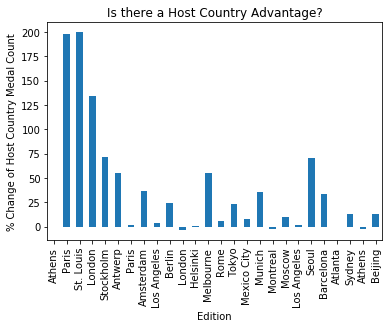

In [408]:
# Extract influence['Change']: change
change = influence['Change']

# Make bar plot of change: ax
ax = change.plot(kind = 'bar')

# Customize the plot to improve readability
ax.set_ylabel("% Change of Host Country Medal Count")
ax.set_title("Is there a Host Country Advantage?")
ax.set_xticklabels(editions['City'])

# Display the plot
plt.show()